In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import cartopy
import cartopy.crs as ccrs
import matplotlib
%matplotlib inline
from netCDF4 import Dataset


import iris
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.colors as colors
from sklearn import datasets
import iris.analysis
import numpy.ma as ma

import matplotlib.ticker as mticker
from matplotlib.ticker import MultipleLocator
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.util import add_cyclic_point


from iris.experimental.regrid import regrid_weighted_curvilinear_to_rectilinear

import matplotlib.cm as mpl_cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.pyplot import xcorr


from scipy.interpolate import splrep, splev
from scipy.stats import pearsonr
from scipy import signal 

import math
from matplotlib import mlab

import warnings
warnings.filterwarnings("ignore")

## PMIP3 AMOC mean (annual) -- model-averages (4 models)

models: CCSM4, FGOALS-g2, MPI-ESM-P, MRI-CGCM3

In [2]:
cube_ccsm_amoc = iris.load_cube('CCSM4_midHolocene.cvdp_data.1000-1300.nc', 'amoc_mean_ann')
cube_fgoalsg2_amoc = iris.load_cube('FGOALS-g2_midHolocene.cvdp_data.340-1019.nc', 'amoc_mean_ann')
cube_mpip_amoc = iris.load_cube('MPI-ESM-P_midHolocene.cvdp_data.1850-1949.nc', 'amoc_mean_ann')
cube_mri3_amoc = iris.load_cube('MRI-CGCM3_midHolocene.cvdp_data.1951-2050.nc', 'amoc_mean_ann')

In [4]:
print(cube_ccsm_amoc)

ocean_meridional_overturning_mass_streamfunction / (Sv) (depth: 61; latitude: 395)
     Dimension coordinates:
          depth                                               x             -
          latitude                                            -             x
     Attributes:
          Conventions: CF-1.6
          NCO: 4.4.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: g...
          comment: MOC converted from Sv to kg s-1, CMIP5_table_comment: differs from CMIP3...
          history: 2012-05-24T17:51:17Z altered by CMOR: replaced missing value flag (9.96921e+36)...
          notes: Data from CCSM4_midHolocene from 1000-1300
          original_name: MOC
          source: NCAR Climate Analysis Section's Climate Variability Diagnostics Package...


In [6]:
print(cube_ccsm_amoc.coord('depth'))

DimCoord(array([   0.        ,   10.        ,   20.        ,   30.        ,
         40.        ,   50.        ,   60.        ,   70.        ,
         80.        ,   90.        ,  100.        ,  110.        ,
        120.        ,  130.        ,  140.        ,  150.        ,
        160.        ,  170.1967926 ,  180.76130676,  191.82118225,
        203.4992981 ,  215.92340088,  229.23309326,  243.58448792,
        259.15579224,  276.15258789,  294.81469727,  315.42367554,
        338.31228638,  363.87466431,  392.58050537,  424.9888916 ,
        461.76660156,  503.70690918,  551.74908447,  606.9967041 ,
        670.72857666,  744.39794922,  829.60699463,  928.04351807,
       1041.36791992, 1171.03991699, 1318.09399414, 1482.90087891,
       1664.99194336, 1863.01403809, 2074.87402344, 2298.0390625 ,
       2529.90405273, 2768.09814453, 3010.67089844, 3256.13793945,
       3503.44897461, 3751.8918457 , 4001.01171875, 4250.52490234,
       4500.26074219, 4750.12011719, 5000.046875  , 5

In [16]:
p=cube_ccsm_amoc.coord('latitude')
pp=p[0:10]
print(pp.points)

[-79.48815155 -78.95290375 -78.41866302 -77.88440704 -77.35016632
 -76.81593323 -76.2816925  -75.74745178 -75.21321869 -74.67897797]


## create a common coord and regrid all models to this coord 

In [3]:
sample_points = [('depth', np.linspace(0,6000,61)),
                 ('latitude',  np.linspace(-89.5,89.5,180))]

In [4]:
amoc_cube=[cube_ccsm_amoc, cube_fgoalsg2_amoc, cube_mpip_amoc, cube_mri3_amoc]

In [7]:
pmip3_modelname=['ccsm','fgoalsg2','mpip','mri3']

In [6]:
for n in range (0,len(pmip3_modelname)): 
    globals()[pmip3_modelname[n]+'_amoc_regrid'] = amoc_cube[n].interpolate(sample_points, iris.analysis.Linear())


In [87]:
print(ccsm_amoc_regrid)

ocean_meridional_overturning_mass_streamfunction / (Sv) (depth: 61; latitude: 180)
     Dimension coordinates:
          depth                                               x             -
          latitude                                            -             x
     Attributes:
          Conventions: CF-1.6
          NCO: 4.4.4
          associated_files: baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation gridspecFile: g...
          comment: MOC converted from Sv to kg s-1, CMIP5_table_comment: differs from CMIP3...
          history: 2012-05-24T17:51:17Z altered by CMOR: replaced missing value flag (9.96921e+36)...
          notes: Data from CCSM4_midHolocene from 1000-1300
          original_name: MOC
          source: NCAR Climate Analysis Section's Climate Variability Diagnostics Package...


In [89]:
print(fgoalsg2_amoc_regrid.coord('latitude')[89:181].points)

[-0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5
 13.5 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5 24.5 25.5 26.5
 27.5 28.5 29.5 30.5 31.5 32.5 33.5 34.5 35.5 36.5 37.5 38.5 39.5 40.5
 41.5 42.5 43.5 44.5 45.5 46.5 47.5 48.5 49.5 50.5 51.5 52.5 53.5 54.5
 55.5 56.5 57.5 58.5 59.5 60.5 61.5 62.5 63.5 64.5 65.5 66.5 67.5 68.5
 69.5 70.5 71.5 72.5 73.5 74.5 75.5 76.5 77.5 78.5 79.5 80.5 81.5 82.5
 83.5 84.5 85.5 86.5 87.5 88.5 89.5]


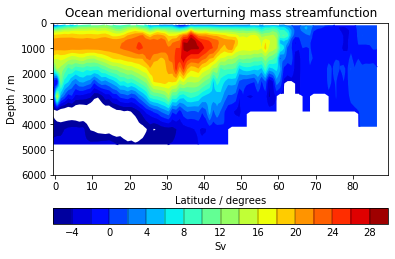

In [90]:
# Draw the contour with 18 levels.
qplt.contourf(fgoalsg2_amoc_regrid[:,89:181], np.arange(-6,32,2),cmap='jet')


In [7]:
pmip3_amoc_model_total= ccsm_amoc_regrid[:,89:181].data + fgoalsg2_amoc_regrid[:,89:181].data + mpip_amoc_regrid[:,89:181].data + mri3_amoc_regrid[:,89:181].data

In [8]:
pmip3_amoc_model_ave=pmip3_amoc_model_total / 4

In [9]:
# then, copy a sample cube to use its coords, but repalce its data with the newly-calculated ones  
pmip3_amoc_model_ave_1 = ccsm_amoc_regrid[:,89:181].copy(data=pmip3_amoc_model_ave)

[Text(0.5, 1.0, 'PMIP3 AMOC mean (annual) in MH\n model-averages')]

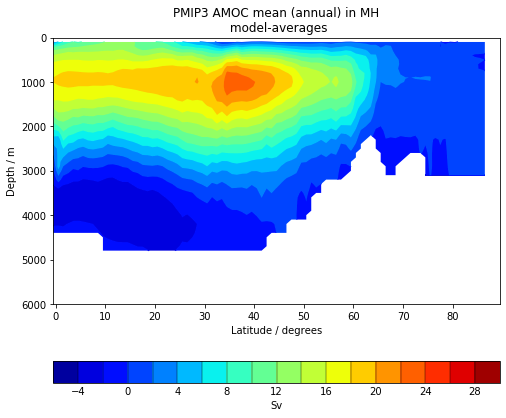

In [10]:
fig=plt.figure(figsize=(8,7))
ax=fig.add_subplot(111)
qplt.contourf(pmip3_amoc_model_ave_1, np.arange(-6,32,2), cmap='jet')
ax.set(title='PMIP3 AMOC mean (annual) in MH\n model-averages')

In [11]:
pi_cube_ccsm_amoc = iris.load_cube('CCSM4_piControl.cvdp_data.250-1300.nc', 'amoc_mean_ann')
pi_cube_fgoalsg2_amoc = iris.load_cube('FGOALS-g2_piControl.cvdp_data.201-900.nc', 'amoc_mean_ann')
pi_cube_mpip_amoc = iris.load_cube('MPI-ESM-P_piControl.cvdp_data.1850-3005.nc', 'amoc_mean_ann')
pi_cube_mri3_amoc = iris.load_cube('MRI-CGCM3_piControl.cvdp_data.1851-2350.nc', 'amoc_mean_ann')

In [12]:
pi_amoc_cube=[pi_cube_ccsm_amoc, pi_cube_fgoalsg2_amoc, pi_cube_mpip_amoc, pi_cube_mri3_amoc]

In [13]:
for n in range (0,len(pmip3_modelname)): 
    globals()['pi_'+ pmip3_modelname[n]+'_amoc_regrid'] = pi_amoc_cube[n].interpolate(sample_points, iris.analysis.Linear())


In [14]:
pi_pmip3_amoc_model_total= pi_ccsm_amoc_regrid[:,89:181].data + pi_fgoalsg2_amoc_regrid[:,89:181].data + pi_mpip_amoc_regrid[:,89:181].data + pi_mri3_amoc_regrid[:,89:181].data

In [15]:
pi_pmip3_amoc_model_ave=pi_pmip3_amoc_model_total / 4

In [85]:
# then, copy a sample cube to use its coords, but repalce its data with the newly-calculated ones  
pi_pmip3_amoc_model_ave_1 = ccsm_amoc_regrid[:,89:181].copy(data=pi_pmip3_amoc_model_ave)

[Text(0.5, 1.0, 'PMIP3 AMOC mean (annual) in piControl\n model-averages')]

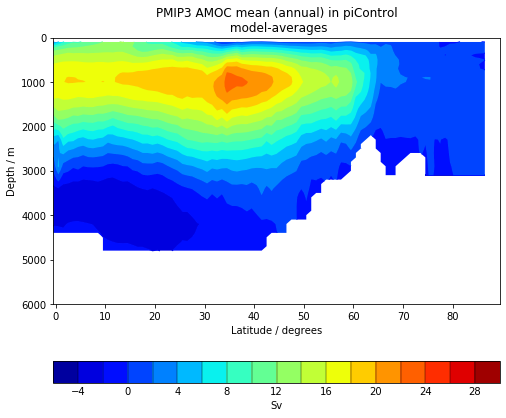

In [61]:
fig=plt.figure(figsize=(8,7))
ax=fig.add_subplot(111)
qplt.contourf(pi_pmip3_amoc_model_ave_1, np.arange(-6,32,2), cmap='jet')
ax.set(title='PMIP3 AMOC mean (annual) in piControl\n model-averages')

[Text(0.5, 1.0, 'PMIP3 AMOC mean (annual) changes (MH - PI)\n model-averages')]

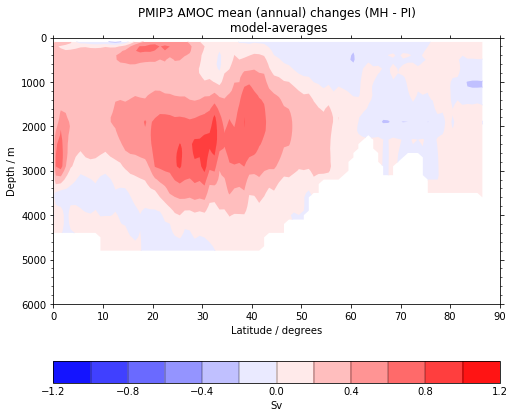

In [18]:
fig=plt.figure(figsize=(8,7))
ax=fig.add_subplot(111)
pmip3_amoc_diff = pmip3_amoc_model_ave_1 - pi_pmip3_amoc_model_ave_1
qplt.contourf(pmip3_amoc_diff, np.arange(-1.2,1.4,0.2), cmap='bwr')

ax.yaxis.set_minor_locator(MultipleLocator(200))
ax.yaxis.set_major_locator(MultipleLocator(1000))
#ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.tick_params(which='both', direction='out', top=True, right=True, labelsize=10.)

ax.set_ylim(6000,0)
ax.set_xlim(0,90)
ax.set(title='PMIP3 AMOC mean (annual) changes (MH - PI)\n model-averages')

[Text(0.5, 1.0, 'PMIP3 AMOC mean (annual) changes (MH - PI)\n model-averages')]

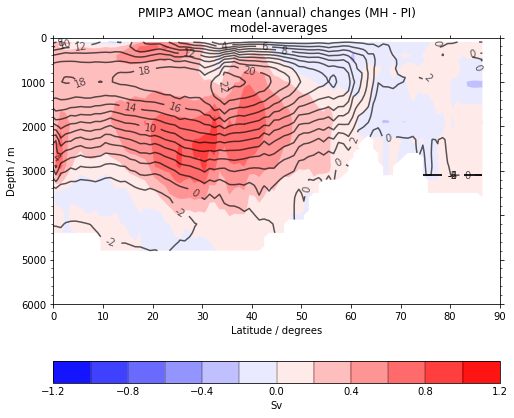

In [97]:
fig=plt.figure(figsize=(8,7))
ax=fig.add_subplot(111)
pmip3_amoc_diff = pmip3_amoc_model_ave_1 - pi_pmip3_amoc_model_ave_1
qplt.contourf(pmip3_amoc_diff, np.arange(-1.2,1.4,0.2), cmap='bwr')

figure=qplt.contour(pi_pmip3_amoc_model_ave_1, np.arange(-6,32,2), colors='k',alpha=0.65)

ax.clabel(figure, inline=1, fontsize=10, fmt='%1.0f') #1.0f means no decimal places, 1.1f means one decimal place, 1.2f means 2 decimal places, etc

#cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
#plt.colorbar(figure,cax=cax,extend='both',**kw)

ax.yaxis.set_minor_locator(MultipleLocator(200))
ax.yaxis.set_major_locator(MultipleLocator(1000))
#ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.tick_params(which='both', direction='out', top=True, right=True, labelsize=10.)

ax.set_ylim(6000,0)
ax.set_xlim(0,90)
ax.set(title='PMIP3 AMOC mean (annual) changes (MH - PI)\n model-averages')

[Text(0.5, 1.0, 'PMIP3 AMOC mean (annual) changes (MH - PI)\n model-averages')]

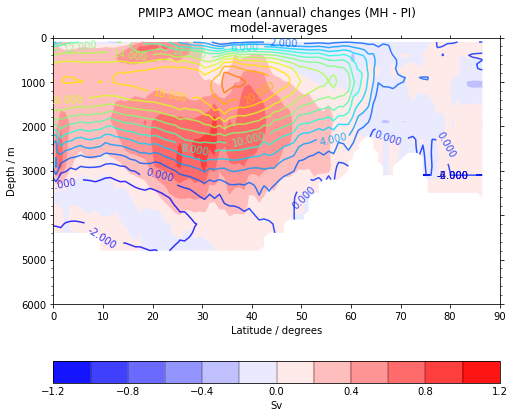

In [33]:
fig=plt.figure(figsize=(8,7))
ax=fig.add_subplot(111)
pmip3_amoc_diff = pmip3_amoc_model_ave_1 - pi_pmip3_amoc_model_ave_1
qplt.contourf(pmip3_amoc_diff, np.arange(-1.2,1.4,0.2), cmap='bwr')
figure=qplt.contour(pi_pmip3_amoc_model_ave_1, np.arange(-6,32,2), cmap='jet',alpha=0.8)

ax.clabel(figure, inline=1, fontsize=10)

#cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
#plt.colorbar(figure,cax=cax,extend='both',**kw)

ax.yaxis.set_minor_locator(MultipleLocator(200))
ax.yaxis.set_major_locator(MultipleLocator(1000))
#ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.tick_params(which='both', direction='out', top=True, right=True, labelsize=10.)

ax.set_ylim(6000,0)
ax.set_xlim(0,90)
ax.set(title='PMIP3 AMOC mean (annual) changes (MH - PI)\n model-averages')

In [2]:
filename_1='CCSM4_midHolocene.cvdp_data.1000-1300.nc'
ccsm=xr.open_dataset(filename_1,decode_times=False)

filename_2='CCSM4_piControl.cvdp_data.250-1300.nc'
pi_ccsm=xr.open_dataset(filename_2,decode_times=False)

filename_25='MPI-ESM-P_midHolocene.cvdp_data.1850-1949.nc'
mpip=xr.open_dataset(filename_25,decode_times=False)

filename_26='MPI-ESM-P_piControl.cvdp_data.1850-3005.nc'
pi_mpip=xr.open_dataset(filename_26,decode_times=False)


In [19]:
ccsm_sst_ann=ccsm.sst_spatialmean_ann
pi_ccsm_sst_ann=pi_ccsm.sst_spatialmean_ann

mpip_sst_ann=mpip.sst_spatialmean_ann
pi_mpip_sst_ann=pi_mpip.sst_spatialmean_ann

In [20]:
ccsm_amoc_sst=ccsm.amoc_sst_regression_ann
pi_ccsm_amoc_sst=pi_ccsm.amoc_sst_regression_ann

mpip_amoc_sst=mpip.amoc_sst_regression_ann
pi_mpip_amoc_sst=pi_mpip.amoc_sst_regression_ann

In [21]:
ccsm_sst_change=ccsm_sst_ann-pi_ccsm_sst_ann

mpip_sst_change=mpip_sst_ann-pi_mpip_sst_ann

In [22]:
ccsm_amoc_sst_change=ccsm_amoc_sst-pi_ccsm_amoc_sst

mpip_amoc_sst_change=mpip_amoc_sst-pi_mpip_amoc_sst

In [23]:
sst_change=[ccsm_sst_change, mpip_sst_change]
#amoc_sst=[ccsm_amoc_sst, mpip_amoc_sst]
amoc_sst_change=[ccsm_amoc_sst_change, mpip_amoc_sst_change]

In [24]:
sst_reg_modelname=['CCSM4','MPI-ESM-P']

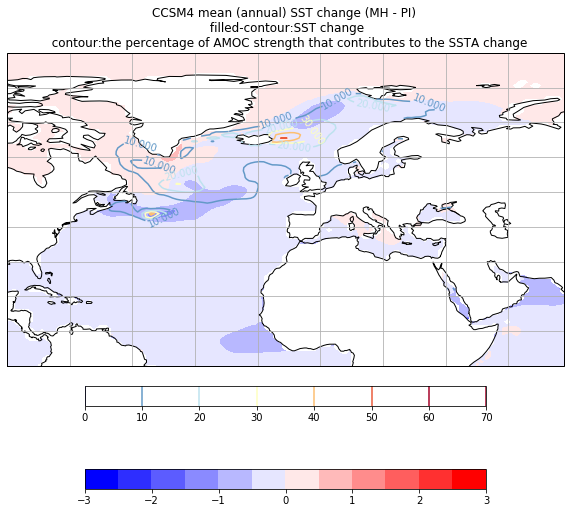

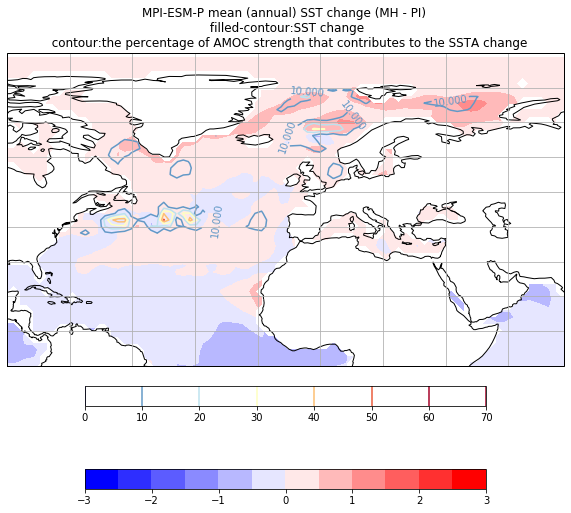

In [25]:
#The SST/TAS patterns associated with AMOC variations are created by 
#regressing SST anomalies (in Celsius) at each grid box over the globe onto the normalized AMOC PC timeseries. 
# SSTA = coefficient * AMOC + constant
#hence, SSTA change = coefficient * (AMOC change)

#the coefficient means: the fraction(%) of AMOC change that contributes to the SSTA change

for i in range (0, len(sst_change)):
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)

    transform=ccrs.PlateCarree()
    bounds_1 = np.linspace(-3,3,13)
    bounds_2 = np.arange(0,80,10)
    norm_1 = colors.BoundaryNorm(boundaries=bounds_1, ncolors=256)
    norm_2 = colors.BoundaryNorm(boundaries=bounds_2, ncolors=256)

    lat_1 = sst_change[i].lat
    lon_1 = sst_change[i].lon
    lat_2 = amoc_sst_change[i].lat
    lon_2 = amoc_sst_change[i].lon

    sst_change[i], lon_1 = add_cyclic_point(sst_change[i], coord=lon_1)
    amoc_sst_change[i], lon_2 = add_cyclic_point(amoc_sst_change[i], coord=lon_2)

    plt.figure(figsize=(12,9))
    ax= plt.axes(projection=projection)

    ax.coastlines()
    ax.gridlines()
    
    region=[-90,70,0,90] #[lon_min,lon_max,lat_min,lat_max]
    fig=ax.contourf(lon_1,lat_1, sst_change[i], levels=bounds_1, transform=transform, cmap='bwr',norm=norm_1)
    coe_fig=ax.contour(lon_2, lat_2, abs(amoc_sst_change[i])*100, levels=bounds_2,transform=transform, cmap='RdYlBu_r',norm=norm_2)
    ax.set_extent(region, ccrs.PlateCarree())    

    ax.clabel(coe_fig, inline=1, fontsize=10)
    cax_1,kw_1 = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.6)
    cax_2,kw_2 = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.6)
    plt.colorbar(fig,cax=cax_1,extend='both',**kw_1)
    plt.colorbar(coe_fig,cax=cax_2,extend='both',**kw_2)
    ax.set(title='%s mean (annual) SST change (MH - PI) \n filled-contour:SST change\n  contour:the percentage of AMOC strength that contributes to the SSTA change' %(sst_reg_modelname[i]))
    

In [32]:
ccsm_tas_ann=ccsm.tas_spatialmean_ann
pi_ccsm_tas_ann=pi_ccsm.tas_spatialmean_ann

mpip_tas_ann=mpip.tas_spatialmean_ann
pi_mpip_tas_ann=pi_mpip.tas_spatialmean_ann

In [33]:
ccsm_amoc_tas=ccsm.amoc_tas_regression_ann
pi_ccsm_amoc_tas=pi_ccsm.amoc_tas_regression_ann

mpip_amoc_tas=mpip.amoc_tas_regression_ann
pi_mpip_amoc_tas=pi_mpip.amoc_tas_regression_ann

In [34]:
ccsm_tas_change=ccsm_tas_ann-pi_ccsm_tas_ann

mpip_tas_change=mpip_tas_ann-pi_mpip_tas_ann

In [35]:
ccsm_amoc_tas_change=ccsm_amoc_tas-pi_ccsm_amoc_tas

mpip_amoc_tas_change=mpip_amoc_tas-pi_mpip_amoc_tas

In [36]:
tas_change=[ccsm_tas_change, mpip_tas_change]
amoc_tas_change=[ccsm_amoc_tas_change, mpip_amoc_tas_change]

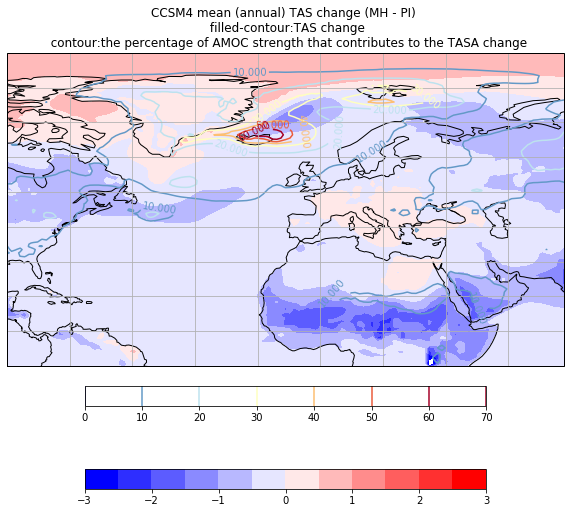

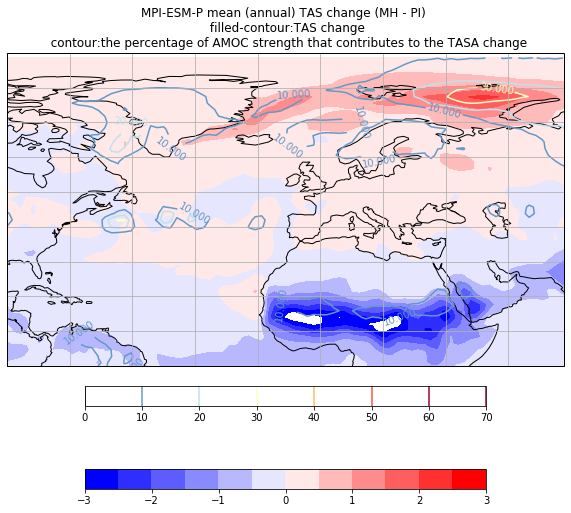

In [37]:
for i in range (0, len(tas_change)):
    projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)

    transform=ccrs.PlateCarree()
    bounds_1 = np.linspace(-3,3,13)
    bounds_2 = np.arange(0,80,10)
    norm_1 = colors.BoundaryNorm(boundaries=bounds_1, ncolors=256)
    norm_2 = colors.BoundaryNorm(boundaries=bounds_2, ncolors=256)

    lat_1 = tas_change[i].lat
    lon_1 = tas_change[i].lon
    lat_2 = amoc_tas_change[i].lat
    lon_2 = amoc_tas_change[i].lon

    tas_change[i], lon_1 = add_cyclic_point(tas_change[i], coord=lon_1)
    amoc_tas_change[i], lon_2 = add_cyclic_point(amoc_tas_change[i], coord=lon_2)

    plt.figure(figsize=(12,9))
    ax= plt.axes(projection=projection)

    ax.coastlines()
    ax.gridlines()
    
    region=[-90,70,0,90] #[lon_min,lon_max,lat_min,lat_max]
    fig=ax.contourf(lon_1,lat_1, tas_change[i], levels=bounds_1, transform=transform, cmap='bwr',norm=norm_1)
    coe_fig=ax.contour(lon_2, lat_2, abs(amoc_tas_change[i])*100, levels=bounds_2,transform=transform, cmap='RdYlBu_r',norm=norm_2)
    ax.set_extent(region, ccrs.PlateCarree())    

    ax.clabel(coe_fig, inline=1, fontsize=10)
    cax_1,kw_1 = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.6)
    cax_2,kw_2 = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.6)
    plt.colorbar(fig,cax=cax_1,extend='both',**kw_1)
    plt.colorbar(coe_fig,cax=cax_2,extend='both',**kw_2)
    ax.set(title='%s mean (annual) TAS change (MH - PI) \n filled-contour:TAS change\n  contour:the percentage of AMOC strength that contributes to the TASA change' %(sst_reg_modelname[i]))
    

## PMIP3 30&50N MH/PI AMOC scatter plot

In [2]:
filename_1='CCSM4_midHolocene.cvdp_data.1000-1300.nc'
ccsm=xr.open_dataset(filename_1,decode_times=False)

filename_2='CCSM4_piControl.cvdp_data.250-1300.nc'
pi_ccsm=xr.open_dataset(filename_2,decode_times=False)

filename_7='FGOALS-g2_midHolocene.cvdp_data.340-1019.nc'
fgoalsg2=xr.open_dataset(filename_7,decode_times=False)

filename_8='FGOALS-g2_piControl.cvdp_data.201-900.nc'
pi_fgoalsg2=xr.open_dataset(filename_8,decode_times=False)

filename_25='MPI-ESM-P_midHolocene.cvdp_data.1850-1949.nc'
mpip=xr.open_dataset(filename_25,decode_times=False)

filename_26='MPI-ESM-P_piControl.cvdp_data.1850-3005.nc'
pi_mpip=xr.open_dataset(filename_26,decode_times=False)


filename_27='MRI-CGCM3_midHolocene.cvdp_data.1951-2050.nc'
mri3=xr.open_dataset(filename_27,decode_times=False)

filename_28='MRI-CGCM3_piControl.cvdp_data.1851-2350.nc'
pi_mri3=xr.open_dataset(filename_28,decode_times=False)


In [3]:
ccsm_amoc_mean=ccsm.amoc_mean_ann
pi_ccsm_amoc_mean=pi_ccsm.amoc_mean_ann

fgoalsg2_amoc_mean=fgoalsg2.amoc_mean_ann
pi_fgoalsg2_amoc_mean=pi_fgoalsg2.amoc_mean_ann

mpip_amoc_mean=mpip.amoc_mean_ann
pi_mpip_amoc_mean=pi_mpip.amoc_mean_ann

mri3_amoc_mean=mri3.amoc_mean_ann
pi_mri3_amoc_mean=pi_mri3.amoc_mean_ann

In [4]:
amoc_mean=[ccsm_amoc_mean, fgoalsg2_amoc_mean, mpip_amoc_mean, mri3_amoc_mean]

In [5]:
pi_amoc_mean=[pi_ccsm_amoc_mean, pi_fgoalsg2_amoc_mean, pi_mpip_amoc_mean, pi_mri3_amoc_mean]

In [6]:
pmip3_modelname=['ccsm','fgoalsg2','mpip','mri3']

In [7]:
for n in range (0,len(pmip3_modelname)):
    globals()[pmip3_modelname[n]+'_lat30_amoc']=amoc_mean[n].sel(lat_amoc=30,method='nearest')

In [8]:
for n in range (0,len(pmip3_modelname)):
    globals()[pmip3_modelname[n]+'_lat50_amoc']=amoc_mean[n].sel(lat_amoc=50,method='nearest')

In [9]:
for n in range (0,len(pmip3_modelname)):
    globals()['pi_'+ pmip3_modelname[n]+'_lat30_amoc']=pi_amoc_mean[n].sel(lat_amoc=30,method='nearest')

In [10]:
for n in range (0,len(pmip3_modelname)):
    globals()['pi_'+ pmip3_modelname[n]+'_lat50_amoc']=pi_amoc_mean[n].sel(lat_amoc=50,method='nearest')

In [11]:
for u in range (0,len(pmip3_modelname)):
    globals()['max_'+ pmip3_modelname[u]+'_lat30_amoc']=np.nanmax(globals()[pmip3_modelname[u]+'_lat30_amoc'])

In [12]:
for u in range (0,len(pmip3_modelname)):
    globals()['max_'+ pmip3_modelname[u]+'_lat50_amoc']=np.nanmax(globals()[pmip3_modelname[u]+'_lat50_amoc'])

In [13]:
for u in range (0,len(pmip3_modelname)):
    globals()['pi_max_'+ pmip3_modelname[u]+'_lat30_amoc']=np.nanmax(globals()['pi_'+ pmip3_modelname[u]+'_lat30_amoc'])

In [14]:
for u in range (0,len(pmip3_modelname)):
    globals()['pi_max_'+ pmip3_modelname[u]+'_lat50_amoc']=np.nanmax(globals()['pi_'+ pmip3_modelname[u]+'_lat50_amoc'])

In [15]:
# print out the MH max AMOC st 30N
amoc_mh_30=[]
for n in range (0,len(pmip3_modelname)):
    amoc_mh_30.append(globals()['max_'+ pmip3_modelname[n]+'_lat30_amoc'])
print(amoc_mh_30)

[20.233278, 22.7345, 20.000252, 15.517204]


In [16]:
# print out the pi max AMOC st 30N
amoc_pi_30=[]
for n in range (0,len(pmip3_modelname)):
    amoc_pi_30.append(globals()['pi_max_'+ pmip3_modelname[n]+'_lat30_amoc'])
print(amoc_pi_30)

[20.486813, 23.108734, 19.40197, 14.64762]


In [17]:
# calculate the change of the maximum AMOC at 30N (MH - PI) 
amoc_30_diff=[]
for u in range (0,len(pmip3_modelname)):
    amoc_30_diff.append(globals()['max_'+ pmip3_modelname[u]+'_lat30_amoc'] - globals()['pi_max_'+ pmip3_modelname[u]+'_lat30_amoc'])
print(amoc_30_diff)

# 'ccsm','fgoalsg2','mpip','mri3'

[-0.25353432, -0.37423325, 0.59828186, 0.8695841]


In [18]:
# print out the MH max AMOC st 50N
amoc_mh_50=[]
for n in range (0,len(pmip3_modelname)):
    amoc_mh_50.append(globals()['max_'+ pmip3_modelname[n]+'_lat50_amoc'])
print(amoc_mh_50)

[15.773216, 18.024992, 16.358164, 14.559904]


In [19]:
# print out the pi max AMOC st 50N
amoc_pi_50=[]
for n in range (0,len(pmip3_modelname)):
    amoc_pi_50.append(globals()['pi_max_'+ pmip3_modelname[n]+'_lat50_amoc'])
print(amoc_pi_50)

[16.254234, 18.318829, 16.17277, 13.765188]


In [20]:
# calculate the change of the maximum AMOC at 50N (MH - PI) 
amoc_50_diff=[]
for u in range (0,len(pmip3_modelname)):
    amoc_50_diff.append(globals()['max_'+ pmip3_modelname[u]+'_lat50_amoc'] - globals()['pi_max_'+ pmip3_modelname[u]+'_lat50_amoc'])
print(amoc_50_diff)

# 'ccsm','fgoalsg2','mpip','mri3'

[-0.48101807, -0.2938366, 0.18539429, 0.7947159]


## PMIP4 30&50N MH/PI AMOC scatter plot

In [21]:
filename_3='CESM2_midHolocene.cvdp_data.1-700.nc'
cesm=xr.open_dataset(filename_3,decode_times=False)

filename_4='CESM2_piControl.cvdp_data.701-1200.nc'
pi_cesm=xr.open_dataset(filename_4,decode_times=False)

filename_5='EC-Earth3-LR_midHolocene.cvdp_data.2245-2445.nc'
ec=xr.open_dataset(filename_5,decode_times=False)

filename_6='EC-Earth3-LR_piControl.cvdp_data.2219-2419.nc'
pi_ec=xr.open_dataset(filename_6,decode_times=False)

filename_31='FGOALS-f3-L_midHolocene.cvdp_data.1020-1219.nc'
fgoalsf3=xr.open_dataset(filename_31,decode_times=False)

filename_32='FGOALS-f3-L_piCtl-substitute.cvdp_data.1850-1899.nc'
pi_fgoalsf3=xr.open_dataset(filename_32,decode_times=False)

filename_11='GISS-E2-1-G_midHolocene.cvdp_data.2900-2999.nc'
giss=xr.open_dataset(filename_11,decode_times=False)

filename_12='GISS-E2-1-G_piControl.cvdp_data.4150-5000.nc'
pi_giss=xr.open_dataset(filename_12,decode_times=False)

filename_13='HadGEM3-GC31-LL_midHolocene.cvdp_data.2250-2349.nc'
hadgem=xr.open_dataset(filename_13,decode_times=False)

filename_14='HadGEM3-GC31-LL_piControl.cvdp_data.2250-2349.nc'
pi_hadgem=xr.open_dataset(filename_14,decode_times=False)

filename_15='INM-CM4-8_midHolocene.cvdp_data.1880-2079.nc'
inm=xr.open_dataset(filename_15,decode_times=False)

filename_16='INM-CM4-8_piControl.cvdp_data.1850-2380.nc'
pi_inm=xr.open_dataset(filename_16,decode_times=False)

filename_17='IPSL-CM6A-LR_midHolocene.cvdp_data.1850-2399.nc'
ipsl=xr.open_dataset(filename_17,decode_times=False)

filename_18='IPSL-CM6A-LR_piControl.cvdp_data.1850-3049.nc'
pi_ipsl=xr.open_dataset(filename_18,decode_times=False)

filename_21='MPI-ESM1-2-LR_midHolocene.cvdp_data.1001-1500.nc'
mpi2=xr.open_dataset(filename_21,decode_times=False)

filename_22='MPI-ESM1-2-LR_piControl.cvdp_data.1850-2849.nc'
pi_mpi2=xr.open_dataset(filename_22,decode_times=False)

filename_23='MRI-ESM2-0_midHolocene.cvdp_data.1951-2150.nc'
mri=xr.open_dataset(filename_23,decode_times=False)

filename_24='MRI-ESM2-0_piControl.cvdp_data.1850-2550.nc'
pi_mri=xr.open_dataset(filename_24,decode_times=False)

filename_29='NorESM2-LM_midHolocene.cvdp_data.2101-2200.nc'
noresm2=xr.open_dataset(filename_29,decode_times=False)

filename_30='NorESM2-LM_piControl.cvdp_data.1710-2100.nc'
pi_noresm2=xr.open_dataset(filename_30,decode_times=False)


In [22]:
# add the fgoalsg3 model
filename_66='../../../Desktop/esgf_data_folder/streamfunction/mh_fgoalsg3_combined.nc'
fgoalsg3=xr.open_dataset(filename_66,decode_times=False)

filename_64='../../../Desktop/esgf_data_folder/streamfunction/pi_fgoalsg3_combined.nc'
pi_fgoalsg3=xr.open_dataset(filename_64,decode_times=False)

In [23]:
cesm_amoc_mean=cesm.amoc_mean_ann
pi_cesm_amoc_mean=pi_cesm.amoc_mean_ann

ec_amoc_mean=ec.amoc_mean_ann
pi_ec_amoc_mean=pi_ec.amoc_mean_ann

fgoalsf3_amoc_mean=fgoalsf3.amoc_mean_ann
pi_fgoalsf3_amoc_mean=pi_fgoalsf3.amoc_mean_ann

giss_amoc_mean=giss.amoc_mean_ann
pi_giss_amoc_mean=pi_giss.amoc_mean_ann

hadgem_amoc_mean=hadgem.amoc_mean_ann
pi_hadgem_amoc_mean=pi_hadgem.amoc_mean_ann

inm_amoc_mean=inm.amoc_mean_ann
pi_inm_amoc_mean=pi_inm.amoc_mean_ann

ipsl_amoc_mean=ipsl.amoc_mean_ann
pi_ipsl_amoc_mean=pi_ipsl.amoc_mean_ann

mpi2_amoc_mean=mpi2.amoc_mean_ann
pi_mpi2_amoc_mean=pi_mpi2.amoc_mean_ann

mri_amoc_mean=mri.amoc_mean_ann
pi_mri_amoc_mean=pi_mri.amoc_mean_ann

noresm2_amoc_mean=noresm2.amoc_mean_ann
pi_noresm2_amoc_mean=pi_noresm2.amoc_mean_ann


In [24]:
fgoalsg3_1=fgoalsg3.sel(basin=0)
fgoalsg3_2=fgoalsg3_1.mean(dim='time')
fgoalsg3_amoc_mean=fgoalsg3_2.msftmz

pi_fgoalsg3_1=pi_fgoalsg3.sel(basin=0)
pi_fgoalsg3_2=pi_fgoalsg3_1.mean(dim='time')
pi_fgoalsg3_amoc_mean=pi_fgoalsg3_2.msftmz

In [25]:
amoc_mean_4=[cesm_amoc_mean, ec_amoc_mean, fgoalsf3_amoc_mean, fgoalsg3_amoc_mean, 
             giss_amoc_mean, hadgem_amoc_mean, inm_amoc_mean, ipsl_amoc_mean, 
             mpi2_amoc_mean, mri_amoc_mean, noresm2_amoc_mean]

In [26]:
pi_amoc_mean_4=[pi_cesm_amoc_mean, pi_ec_amoc_mean, pi_fgoalsf3_amoc_mean, pi_fgoalsg3_amoc_mean,
                pi_giss_amoc_mean, pi_hadgem_amoc_mean, pi_inm_amoc_mean, pi_ipsl_amoc_mean, 
                pi_mpi2_amoc_mean, pi_mri_amoc_mean, pi_noresm2_amoc_mean]

In [27]:
pmip4_modelname=['cesm','ec','fgoalsf3','fgoalsg3','giss','hadgem','inm','ipsl','mpi2','mri','noresm2']

In [28]:
#for n in range (0,len(pmip4_modelname)):
for n in (0,1,2,4,5,6,7,8,9,10):  #except for fgoalsg3
    globals()[pmip4_modelname[n]+'_lat30_amoc']=amoc_mean_4[n].sel(lat_amoc=30,method='nearest')

In [29]:
for n in (0,1,2,4,5,6,7,8,9,10):
    globals()[pmip4_modelname[n]+'_lat50_amoc']=amoc_mean_4[n].sel(lat_amoc=50,method='nearest')

In [30]:
for n in (0,1,2,4,5,6,7,8,9,10):
    globals()['pi_'+ pmip4_modelname[n]+'_lat30_amoc']=pi_amoc_mean_4[n].sel(lat_amoc=30,method='nearest')

In [31]:
for n in (0,1,2,4,5,6,7,8,9,10):
    globals()['pi_'+ pmip4_modelname[n]+'_lat50_amoc']=pi_amoc_mean_4[n].sel(lat_amoc=50,method='nearest')

In [32]:
for u in (0,1,2,4,5,6,7,8,9,10):
    globals()['max_'+ pmip4_modelname[u]+'_lat30_amoc']=np.nanmax(globals()[pmip4_modelname[u]+'_lat30_amoc'])

In [33]:
for u in (0,1,2,4,5,6,7,8,9,10):
    globals()['max_'+ pmip4_modelname[u]+'_lat50_amoc']=np.nanmax(globals()[pmip4_modelname[u]+'_lat50_amoc'])

In [34]:
for u in (0,1,2,4,5,6,7,8,9,10):
    globals()['pi_max_'+ pmip4_modelname[u]+'_lat30_amoc']=np.nanmax(globals()['pi_'+ pmip4_modelname[u]+'_lat30_amoc'])

In [35]:
for u in (0,1,2,4,5,6,7,8,9,10):
    globals()['pi_max_'+ pmip4_modelname[u]+'_lat50_amoc']=np.nanmax(globals()['pi_'+ pmip4_modelname[u]+'_lat50_amoc'])

In [36]:
for t in range (3,4): #for fgoalsg3
    globals()[pmip4_modelname[t]+'_lat30_amoc']=amoc_mean_4[t].sel(lat=30,method='nearest')

In [37]:
for t in range (3,4): #for fgoalsg3
    globals()[pmip4_modelname[t]+'_lat50_amoc']=amoc_mean_4[t].sel(lat=50,method='nearest')

In [38]:
for t in range (3,4):
    globals()['pi_'+ pmip4_modelname[t]+'_lat30_amoc']=pi_amoc_mean_4[t].sel(lat=30,method='nearest')

In [39]:
for t in range (3,4):
    globals()['pi_'+ pmip4_modelname[t]+'_lat50_amoc']=pi_amoc_mean_4[t].sel(lat=50,method='nearest')

In [40]:
for u in range (3,4):
    globals()['max_'+ pmip4_modelname[u]+'_lat30_amoc']=np.nanmax(globals()[pmip4_modelname[u]+'_lat30_amoc'])

In [41]:
for u in range (3,4):
    globals()['max_'+ pmip4_modelname[u]+'_lat50_amoc']=np.nanmax(globals()[pmip4_modelname[u]+'_lat50_amoc'])

In [42]:
for u in range (3,4):
    globals()['pi_max_'+ pmip4_modelname[u]+'_lat30_amoc']=np.nanmax(globals()['pi_'+ pmip4_modelname[u]+'_lat30_amoc'])

In [43]:
for u in range (3,4):
    globals()['pi_max_'+ pmip4_modelname[u]+'_lat50_amoc']=np.nanmax(globals()['pi_'+ pmip4_modelname[u]+'_lat50_amoc'])

## calculate the max AMOC at 30/50N for mh/pi

In [44]:
# print out the MH max AMOC st 30N
amoc_mh_30=[]

for n in range (0,len(pmip4_modelname)):
    if n in (0,1,2,4,5,6,7,8,9,10):
        amoc_mh_30.append(globals()['max_'+ pmip4_modelname[n]+'_lat30_amoc'])
    else:
        amoc_mh_30.append(globals()['max_'+ pmip4_modelname[n]+'_lat30_amoc'] * 1e-9) # convert the units from kg/s to Sv

# print out the value with 6 decimal places        
Amoc_mh_30=[round(num, 6) for num in amoc_mh_30]
print(Amoc_mh_30)

# 'cesm','ec','fgoalsf3','fgoalsg3','giss','hadgem','inm','ipsl','mpi2','mri','noresm2'

[19.411755, 16.239342, 24.429445, 33.466239, 24.501793, 18.355944, 16.329693, 11.590652, 20.06861, 20.248077, 21.449335]


In [45]:
# print out the pi max AMOC st 30N
amoc_pi_30=[]
for n in range (0,len(pmip4_modelname)):
    if n in (0,1,2,4,5,6,7,8,9,10):
        amoc_pi_30.append(globals()['pi_max_'+ pmip4_modelname[n]+'_lat30_amoc'])
    else:
        amoc_pi_30.append(globals()['pi_max_'+ pmip4_modelname[n]+'_lat30_amoc'] * 1e-9)

Amoc_pi_30=[round(num, 6) for num in amoc_pi_30]
print(Amoc_pi_30)

[19.105024, 14.982977, 23.945753, 32.806423, 24.397606, 16.976843, 17.056538, 12.129082, 20.06891, 18.007044, 21.176233]


In [46]:
# calculate the change of the maximum AMOC at 30N (MH - PI) 
amoc_30_diff=[] 
for n in range (0, len(pmip4_modelname)):
    amoc_30_diff.append (amoc_mh_30[n] - amoc_pi_30[n])

Amoc_30_diff = [round(num, 6) for num in amoc_30_diff]
print(Amoc_30_diff)

# 'cesm','ec','fgoalsf3','fgoalsg3','giss','hadgem','inm','ipsl','mpi2','mri','noresm2'

[0.30673, 1.256365, 0.483692, 0.659816, 0.104187, 1.379101, -0.726845, -0.53843, -0.000301, 2.241034, 0.273102]


In [47]:
# print out the MH max AMOC st 50N
amoc_mh_50=[]

for n in range (0,len(pmip4_modelname)):
    if n in (0,1,2,4,5,6,7,8,9,10):
        amoc_mh_50.append(globals()['max_'+ pmip4_modelname[n]+'_lat50_amoc'])
    else:
        amoc_mh_50.append(globals()['max_'+ pmip4_modelname[n]+'_lat50_amoc'] * 1e-9) # convert the units from kg/s to Sv

# print out the value with 6 decimal places        
Amoc_mh_50=[round(num, 6) for num in amoc_mh_50]
print(Amoc_mh_50)

[16.425135, 15.29902, 21.285234, 34.809016, 15.316298, 14.522717, 5.739996, 10.454684, 16.549305, 16.636135, 13.447311]


In [48]:
# print out the pi max AMOC st 50N
amoc_pi_50=[]
for n in range (0,len(pmip4_modelname)):
    if n in (0,1,2,4,5,6,7,8,9,10):
        amoc_pi_50.append(globals()['pi_max_'+ pmip4_modelname[n]+'_lat50_amoc'])
    else:
        amoc_pi_50.append(globals()['pi_max_'+ pmip4_modelname[n]+'_lat50_amoc'] * 1e-9)

Amoc_pi_50=[round(num, 6) for num in amoc_pi_50]
print(Amoc_pi_50)

[16.229677, 14.52121, 20.798315, 33.230043, 15.479198, 13.909647, 5.989632, 10.860806, 16.654346, 16.237524, 13.554823]


In [49]:
# calculate the change of the maximum AMOC at 50N (MH - PI) 
amoc_50_diff=[] 
for n in range (0, len(pmip4_modelname)):
    amoc_50_diff.append (amoc_mh_50[n] - amoc_pi_50[n])

Amoc_50_diff = [round(num, 6) for num in amoc_50_diff]
print(Amoc_50_diff)

# 'cesm','ec','fgoalsf3','fgoalsg3','giss','hadgem','inm','ipsl','mpi2','mri','noresm2'

[0.195457, 0.77781, 0.486918, 1.578973, -0.162899, 0.61307, -0.249636, -0.406121, -0.105042, 0.398611, -0.107512]


In [67]:
df= pd.read_csv('PMIP4_mh_modellist.csv',skipinitialspace=True,header=0)
df

,number,model,color,mhncl_R,mhncl_G,mhncl_B,ipccncl_r,ipccncl_g,ipccncl_b,mh_r,mh_g,mh_b,ipcc_r,ipcc_g,ipcc_b
0,1,AWI-ESM-1-1-LR,darkorange2,238,118,0,153.0,0.0,255.0,0.933333,0.462745,0.000000,0.600000,0.000000,1.000000
1,2,CESM2,darkturquoise,0,206,209,67.0,178.0,216.0,0.000000,0.807843,0.819608,0.262745,0.698039,0.847059
2,3,EC-Earth3-LR,deeppink2,238,18,137,124.0,99.0,184.0,0.933333,0.070588,0.537255,0.486275,0.388235,0.721569
3,4,FGOALS-f3-L,blue4,0,0,139,248.0,154.0,28.0,0.000000,0.000000,0.545098,0.972549,0.603922,0.109804
4,5,FGOALS-g3,lightblue1,191,239,255,248.0,154.0,28.0,0.749020,0.937255,1.000000,0.972549,0.603922,0.109804
5,6,GISS-E2-1-G,magenta4,139,0,139,119.0,29.0,123.0,0.545098,0.000000,0.545098,0.466667,0.113725,0.482353
6,7,HadGEM3-GC31-LL,green4,0,139,0,122.0,139.0,38.0,0.000000,0.545098,0.000000,0.478431,0.545098,0.149020
7,8,INM-CM4-8,firebrick,178,34,34,247.0,67.0,67.0,0.698039,0.133333,0.133333,0.968627,0.262745,0.262745
8,9,IPSL-CM6A-LR,chocolate4,139,69,19,91.0,83.0,174.0,0.545098,0.270588,0.074510,0.356863,0.325490,0.682353
9,10,MIROC-ES2L,purple,160,32,240,184.0,95.0,182.0,0.627451,0.125490,0.941176,0.721569,0.372549,0.713725


In [68]:
# select the model that I need 
import csv

DESIRED_ROWS = {2,3,4,5,6,7,8,9,11,12,15}
with open("PMIP4_mh_modellist.csv") as input_file:
    reader = csv.reader(input_file)

    desired_rows = [row for row_number, row in enumerate(reader)
                    if row_number in DESIRED_ROWS]

df_sel = pd.DataFrame(desired_rows,columns=['number','model','color','mhncl_R','mhncl_G','mhncl_B','ipccncl_r','ipccncl_g','ipccncl_b','mh_r','mh_g','mh_b','ipcc_r','ipcc_g','ipcc_b',])
df_sel

,number,model,color,mhncl_R,mhncl_G,mhncl_B,ipccncl_r,ipccncl_g,ipccncl_b,mh_r,mh_g,mh_b,ipcc_r,ipcc_g,ipcc_b
0,2,CESM2,darkturquoise,0,206,209,67,178,216,0,0.807843137,0.819607843,0.262745098,0.698039216,0.847058824
1,3,EC-Earth3-LR,deeppink2,238,18,137,124,99,184,0.933333333,0.070588235,0.537254902,0.48627451,0.388235294,0.721568627
2,4,FGOALS-f3-L,blue4,0,0,139,248,154,28,0,0,0.545098039,0.97254902,0.603921569,0.109803922
3,5,FGOALS-g3,lightblue1,191,239,255,248,154,28,0.749019608,0.937254902,1,0.97254902,0.603921569,0.109803922
4,6,GISS-E2-1-G,magenta4,139,0,139,119,29,123,0.545098039,0,0.545098039,0.466666667,0.11372549,0.482352941
5,7,HadGEM3-GC31-LL,green4,0,139,0,122,139,38,0,0.545098039,0,0.478431373,0.545098039,0.149019608
6,8,INM-CM4-8,firebrick,178,34,34,247,67,67,0.698039216,0.133333333,0.133333333,0.968627451,0.262745098,0.262745098
7,9,IPSL-CM6A-LR,chocolate4,139,69,19,91,83,174,0.545098039,0.270588235,0.074509804,0.356862745,0.325490196,0.682352941
8,11,MPI-ESM1-2-LR,brown4,139,35,35,93,161,162,0.545098039,0.137254902,0.137254902,0.364705882,0.631372549,0.635294118
9,12,MRI-ESM2-0,darkseagreen4,105,139,105,173,255,47,0.411764706,0.545098039,0.411764706,0.678431373,1,0.184313725


In [69]:
#save the selected model info to a new CSV file 
# in order to use the new file for colour info
df_sel.to_csv('PMIP4_mh_mymodel.csv')

In [50]:
pmip4_model_name=['CESM2','EC-Earth3-LR','FGOALS-f3-L','FGOALS-g3',
                  'GISS-E2-1-G','HadGEM3-GC31-LL',
                  'INM-CM4-8','IPSL-CM6A-LR','MPI-ESM1-2-LR','MRI-ESM2-0',
                  'NorESM2-LM']

In [51]:
pmip4_r=pd.read_csv('PMIP4_mh_mymodel.csv',skipinitialspace=True,header=0)['ipcc_r']
pmip4_g=pd.read_csv('PMIP4_mh_mymodel.csv',skipinitialspace=True,header=0)['ipcc_g']
pmip4_b=pd.read_csv('PMIP4_mh_mymodel.csv',skipinitialspace=True,header=0)['ipcc_b']

In [52]:
pmip3_model_name=['CCSM4','FGOALS-G2','MPI-ESM-P','MRI-CGCM3']

In [53]:
pmip3_legend_color=['orangered','limegreen','violet','blue']

## plot PMIP3 & PMIP4 data on the same plot

[Text(0.5, 1.0, 'AMOC at 30N & 50N in simulations (MH and PI)')]

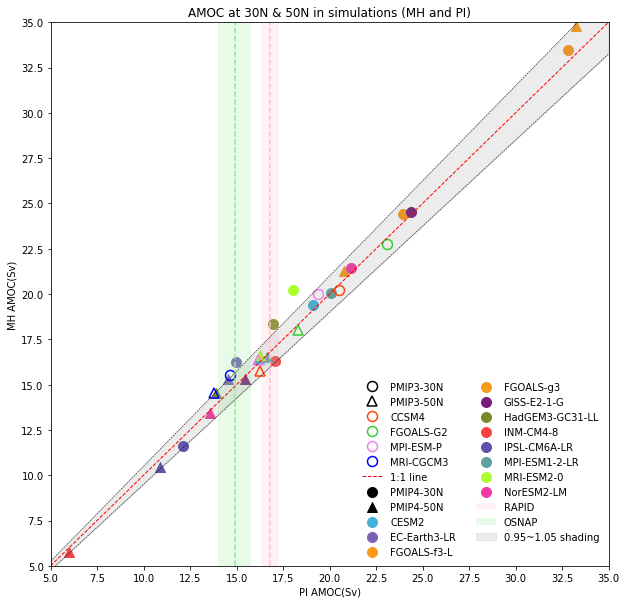

In [54]:
fig=plt.figure(figsize=(10,10)) 

ax=fig.add_subplot(111)

ax.plot(0,0,color='k',marker='o',label='PMIP3-30N',fillstyle='none', mew=1.5, ms=5,linestyle='None',markersize=10)
ax.plot(0,0,color='k',marker='^',label='PMIP3-50N',fillstyle='none', mew=1.5, ms=5,linestyle='None',markersize=10)
ax.scatter(0,0,color='k',marker='o',label='PMIP4-30N', s=100)
ax.scatter(0,0,color='k',marker='^',label='PMIP4-50N', s=100)
    

for k in range (0,len(pmip3_modelname)):
    ax.plot(globals()['pi_max_'+ pmip3_modelname[k]+'_lat30_amoc'], globals()['max_'+ pmip3_modelname[k]+'_lat30_amoc'], label=pmip3_model_name[k], color=pmip3_legend_color[k], marker='o',fillstyle='none', mew=1.5, ms=5,linestyle='None',markersize=10)
    ax.plot(globals()['pi_max_'+ pmip3_modelname[k]+'_lat50_amoc'], globals()['max_'+ pmip3_modelname[k]+'_lat50_amoc'], color=pmip3_legend_color[k], marker='^',fillstyle='none', mew=1.5, ms=5,linestyle='None', markersize=10)

for m in range (0,len(pmip4_modelname)):
    ax.scatter(amoc_pi_30[m], amoc_mh_30[m], label=pmip4_model_name[m], color=(pmip4_r[m],pmip4_g[m],pmip4_b[m]), marker='o', s=100)
    ax.scatter(amoc_pi_50[m], amoc_mh_50[m], color=(pmip4_r[m],pmip4_g[m],pmip4_b[m]), marker='^', s=100)

    
#Y1=[5,5]
#Y2=[30,30]
#X1=[14,15.8]
#X2=[16.3,17.3]#overlap RAPID 16.8+/-0.5

X1=np.linspace(14,15.8,100) #OSNAP:14.9+/-0.9 Sv
X2=np.linspace(16.3,17.3,100) #overlap RAPID 16.8+/-0.5
Y1=5
Y2=35
ax.axvline(x=16.8,color='pink',linestyle="--",linewidth=1.5)
ax.fill_between(X2,Y1,Y2,facecolor='pink', alpha=0.2, label='RAPID') # define the range for x-axis, then define the range for y-axis (upper & bottom)
ax.axvline(x=14.9,color='lightgreen',linestyle="--",linewidth=1.5)
ax.fill_between(X1,Y1,Y2,facecolor='lightgreen', alpha=0.2, label='OSNAP')
    
x=np.linspace(5,35,100)
y=x
ax.plot(x,y,'--',linewidth=1, color='r',label='1:1 line')
ax.plot(x,0.95*y, '--',linewidth=0.5, color='black')
ax.plot(x,1.05*y, '--',linewidth=0.5, color='black')
ax.fill_between(x, 0.95*y, 1.05*y, color='grey', alpha=0.15, label='0.95~1.05 shading')
ax.set(xlabel='PI AMOC(Sv)',ylabel='MH AMOC(Sv)')
ax.set_xlim(5,35)
ax.set_ylim(5,35)
ax.xaxis.set_major_locator(MultipleLocator(2.5))
ax.yaxis.set_major_locator(MultipleLocator(2.5))
ax.legend(loc='lower right',ncol=2, edgecolor='None',facecolor='None')
ax.set(title='AMOC at 30N & 50N in simulations (MH and PI)')

# max AMOC at 50N for fgoalsg3 =34.8 Sv